# 意思決定分析と予測の活用｜第4部 効用理論入門
https://logics-of-blue.com/decision-analysis-and-forecast-book-support/

## 第2章	期待効用理論

### Pythonによる効用関数の同定

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd

# DataFrameの全角文字の出力をきれいにする
pd.set_option('display.unicode.east_asian_width', True)
# 本文の数値とあわせるために、小数点以下3桁で丸める
pd.set_option('display.precision', 3)

# 補間
from scipy import interpolate

# グラフ描画
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# グラフの日本語表記
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Meiryo'

In [2]:
# 確実同値額と効用
cme =     np.array([0,    5,  20,   50, 100])
utility = np.array([0, 0.25, 0.5, 0.75,   1])

In [3]:
# 金額を入力すると、線形補間された効用が出力される関数
u_func = interpolate.interp1d(cme, utility)

# 0から100まで1区切りで効用を計算
money = np.arange(0, 101, 1)
interpolated_utility = u_func(money)

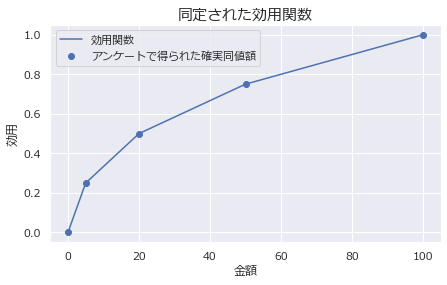

In [4]:
# 描画オブジェクトを生成
fig, ax = plt.subplots(figsize=(7, 4))

# グラフの描画
ax.plot(money, interpolated_utility, label='効用関数')
ax.scatter(cme, utility, label='アンケートで得られた確実同値額')

# グラフの装飾
ax.set_title('同定された効用関数', fontsize=15)
ax.set_xlabel('金額')
ax.set_ylabel('効用')
ax.legend(loc='upper left')

### 意思決定に関わる要素の整理

In [5]:
# 最大値をとるインデックスを取得する。最大値が複数ある場合はすべて出力する。
def argmax_list(series):
    return(list(series[series == series.max()].index))

In [6]:
# 期待値最大化に基づく意思決定を行う関数
def max_emv(probs, payoff_table):
    emv = payoff_table.mul(probs, axis=0).sum()
    max_emv = emv.max()
    a_star = argmax_list(emv)
    return(pd.Series([a_star, max_emv], index=['選択肢', '期待値']))

In [7]:
# 利得行列(金額換算)
payoff = pd.DataFrame({
    '対策なし': [100, 0],
    '対策あり': [50, 50]
})
payoff.index = ['問題なし', '問題あり']
print(payoff)

          対策なし  対策あり
問題なし       100        50
問題あり         0        50


In [8]:
# 同時分布
joint_forecast_state = pd.DataFrame({
    '予測-問題なし': [0.4, 0.1],
    '予測-問題あり': [0.05, 0.45]
})
joint_forecast_state.index = ['問題なし', '問題あり']
print(joint_forecast_state)

          予測-問題なし  予測-問題あり
問題なし            0.4           0.05
問題あり            0.1           0.45


In [9]:
# 予測の周辺分布
marginal_forecast = joint_forecast_state.sum(axis=0)
marginal_forecast

予測-問題なし    0.5
予測-問題あり    0.5
dtype: float64

In [10]:
# 予測が得られた後の条件付き分布
conditional_forecast = joint_forecast_state.div(marginal_forecast, axis=1)
print(conditional_forecast)

          予測-問題なし  予測-問題あり
問題なし            0.8            0.1
問題あり            0.2            0.9


### 期待金額に基づく意思決定

In [11]:
info_decision = \
    conditional_forecast.apply(max_emv, axis=0, payoff_table=payoff)
print(info_decision)

       予測-問題なし 予測-問題あり
選択肢    [対策なし]    [対策あり]
期待値            80            50


In [12]:
emv_forecast = info_decision.loc['期待値'].mul(marginal_forecast).sum()
print(f'情報を使ったときの期待金額: {emv_forecast:.3g}万円')

情報を使ったときの期待金額: 65万円


### 期待効用に基づく意思決定

In [13]:
# 利得(金額)を効用に変換する
payoff_u = payoff.apply(u_func)
print(payoff_u)

          対策なし  対策あり
問題なし       1.0      0.75
問題あり       0.0      0.75


In [14]:
# 期待効用に基づく意思決定
info_decision_u = \
    conditional_forecast.apply(max_emv, axis=0, payoff_table=payoff_u)
print(info_decision_u)

       予測-問題なし 予測-問題あり
選択肢    [対策なし]    [対策あり]
期待値           0.8          0.75


In [15]:
u_forecast = info_decision_u.loc['期待値'].mul(marginal_forecast).sum()
print(f'情報を使ったときの期待効用: {u_forecast:.3g}')

情報を使ったときの期待効用: 0.775


In [16]:
# 参考
money = 55
u_func(money)

array(0.775)